In [1]:
# Necessary libraries

import pandas as pd
import numpy as np

import sympy as sp

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

In [2]:
# initializations

df = pd.DataFrame(columns=['element', 'n', 'l', 'electrons', 'space', 'radial_atomic_orbit', 'electron_density', 'radial_distr_func'])
theDict = {'r':{},'k':{}}

He_to_Ne = list(enumerate(['He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne'],2))
orbitals = [(1,'s'), (2,'s'), (2,'p')]
atomic_number = dict([tup[::-1] for tup in He_to_Ne])
aqn = {'s':0, 'p':1} # azimuthal quantum number (letter to number)
inv_aqn = ['s', 'p'] # azimuthal quantum number (number to letter)

In [3]:
# symbolic variables

n = sp.Symbol('n', positive=True, integer=True)
l = sp.Symbol('l', integer=True)
Z = sp.Symbol('Z', positive=True, real=True)

r = sp.Symbol('r', positive=True, real=True)
k = sp.Symbol('k', positive=True, real=True)

In [4]:
# normalization factor at the primitive basis in position space

N = lambda n_,Z_: ((2*Z)**(n+sp.Rational(1,2))/(sp.sqrt(sp.factorial(2*n)))).subs({n:n_, Z:Z_})
N(n,Z)

(2*Z)**(n + 1/2)/sqrt(factorial(2*n))

In [5]:
# normalized primitive basis in position space

sr = lambda n_,Z_,r_: (N(n,Z)*r**(n-1)*sp.E**(-Z*r)).subs({n:n_, Z:Z_, r:r_})
sr(n,Z,r)

r**(n - 1)*(2*Z)**(n + 1/2)*exp(-Z*r)/sqrt(factorial(2*n))

In [6]:
# normalized primitive basis in momentum space

sk = lambda n_,l_,Z_: sp.Integral((sp.sqrt(2/sp.pi)*r**2*sr(n_,Z_,r)*sp.jn(l_, k*r)).simplify(), (r,0,sp.oo)) \
if (type(n_)==sp.Symbol) or (type(l_)==sp.Symbol) else \
sp.Integral((sp.sqrt(2/sp.pi)*r**2*sr(n_,Z_,r)*sp.expand_func(sp.jn(l_, k*r))).simplify(), (r,0,sp.oo)).simplify().factor()

sk(n,l,Z)

Integral(Z**(n + 1/2)*(2*r)**(n + 1)*exp(-Z*r)*jn(l, k*r)/(sqrt(pi)*sqrt(factorial(2*n))), (r, 0, oo))

In [7]:
# dictionary as a database for orbital expansion coefficients (C) and orbital exponents (Z)

data_dict = {}

data_dict['He'] = {'1s':[(1, 1.4595,  1.347900), (3, 5.3244, -0.001613), 
                         (2, 2.6298, -0.100506), (2, 1.7504, -0.270779)]}

data_dict['Li'] = {'1s':[(1, 4.3069,  0.141279), (1, 2.4573,  0.874231), (3, 6.7850, -0.005201),
                         (2, 7.4527, -0.002307), (2, 1.8504,  0.006985), (2, 0.7667, -0.000305), 
                         (2, 0.6364,  0.000760)], 
                   '2s':[(1, 4.3069, -0.022416), (1, 2.4573, -0.135791), (3, 6.7850,  0.000389),
                         (2, 7.4527, -0.000068), (2, 1.8504, -0.076544), (2, 0.7667,  0.340542), 
                         (2, 0.6364,  0.715708)]}

data_dict['Be'] = {'1s':[(1, 5.7531,  0.285107), (1, 3.7156,  0.474813), (3, 9.9670, -0.001620),
                         (3, 3.7128,  0.052852), (2, 4.4661,  0.243499), (2, 1.2919,  0.000106),
                         (2, 0.8555, -0.000032)], 
                   '2s':[(1, 5.7531, -0.016378), (1, 3.7156, -0.155066), (3, 9.9670,  0.000426),
                         (3, 3.7128, -0.059234), (2, 4.4661, -0.031925), (2, 1.2919,  0.387968),
                         (2, 0.8555,  0.685674)]}

data_dict['B']  = {'1s':[(1, 7.0178,  0.381607), (1, 3.9468,  0.423958), (3, 12.7297, -0.001316), 
                         (3, 2.7646, -0.000822), (2, 5.7420,  0.237016), (2,  1.5436,  0.001062),
                         (2, 1.0802, -0.000137)], 
                   '2s':[(1, 7.0178, -0.022549), (1, 3.9468,  0.321716), (3, 12.7297, -0.000452), 
                         (3, 2.7646, -0.072032), (2, 5.7420, -0.050313), (2,  1.5436, -0.484281),
                         (2, 1.0802, -0.518986)], 
                   '2p':[(2, 5.7416,  0.007600), (2, 2.6341,  0.045137), (2,  1.8340,  0.184206), 
                         (2, 1.1919,  0.394754), (2, 0.8494,  0.432795)]}

data_dict['C']  = {'1s':[(1, 8.4936,  0.352872), (1, 4.8788,  0.473621), (3, 15.4660, -0.001199),
                         (2, 7.0500,  0.210887), (2, 2.2640,  0.000886), (2,  1.4747,  0.000465),
                         (2, 1.1639, -0.000119)], 
                   '2s':[(1, 8.4936, -0.071727), (1, 4.8788,  0.438307), (3, 15.4660, -0.000383),
                         (2, 7.0500, -0.091194), (2, 2.2640, -0.393105), (2,  1.4747, -0.579121),
                         (2, 1.1639, -0.126067)], 
                   '2p':[(2, 7.0500,  0.006977), (2, 3.2275,  0.070877), (2,  2.1908,  0.230802),
                         (2, 1.4413,  0.411931), (2, 1.0242,  0.350701)]}


data_dict['N']  = {'1s':[(1, 9.9051,  0.354839), (1, 5.7429,  0.472579), (3, 17.9816, -0.001038), 
                         (2, 8.3087,  0.208492), (2, 2.7611,  0.001687), (2,  1.8223,  0.000206), 
                         (2, 1.4191,  0.000064)], 
                   '2s':[(1, 9.9051, -0.067498), (1, 5.7429,  0.434142), (3, 17.9816, -0.000315), 
                         (2, 8.3087, -0.080331), (2, 2.7611, -0.374128), (2,  1.8223, -0.522775), 
                         (2, 1.4191, -0.207735)], 
                   '2p':[(2, 8.3490,  0.006323), (2, 3.8827,  0.082938), (2,  2.5920,  0.260147), 
                         (2, 1.6946,  0.418361), (2, 1.1914,  0.308272)]}

data_dict['O']  = {'1s':[(1, 11.2970,  0.360063), (1, 6.5966,  0.466625), (3, 20.5019, -0.000918), 
                         (2,  9.5546,  0.208441), (2, 3.2482,  0.002018), (2,  2.1608,  0.000216), 
                         (2,  1.6411,  0.000133)], 
                   '2s':[(1, 11.2970, -0.064363), (1, 6.5966,  0.433186), (3, 20.5019, -0.000275), 
                         (2,  9.5546, -0.072497), (2, 3.2482, -0.369900), (2,  2.1608, -0.512627), 
                         (2,  1.6411, -0.227421)], 
                   '2p':[(2,  9.6471,  0.005626), (2, 4.3323,  0.126618), (2,  2.7502,  0.328966), 
                         (2,  1.7525,  0.395422), (2, 1.2473,  0.231788)]}

data_dict['F']  = {'1s':[(1, 12.6074,  0.377498), (1, 7.4101,  0.443947), (3, 23.2475, -0.000797), 
                         (2, 10.7416,  0.213846), (2, 3.7543,  0.002183), (2,  2.5009,  0.000335), 
                         (2,  1.8577,  0.000147)], 
                   '2s':[(1, 12.6074, -0.058489), (1, 7.4101,  0.426450), (3, 23.2475, -0.000274), 
                         (2, 10.7416, -0.063457), (2, 3.7543, -0.358939), (2,  2.5009, -0.516660), 
                         (2,  1.8577, -0.239143)], 
                   '2p':[(2, 11.0134,  0.004879), (2, 4.9962,  0.130794), (2,  3.1540,  0.337876), 
                         (2,  1.9722,  0.396122), (2, 1.3632,  0.225374)]}

data_dict['Ne'] = {'1s':[(1, 13.9074,  0.392290), (1, 8.2187,  0.425817), (3, 26.0325, -0.000702), 
                         (2, 11.9249,  0.217206), (2, 4.2635,  0.002300), (2, 2.8357,   0.000463), 
                         (2,  2.0715,  0.000147)], 
                   '2s':[(1, 13.9074, -0.053023), (1, 8.2187,  0.419502), (3, 26.0325, -0.000263), 
                         (2, 11.9249, -0.055723), (2, 4.2635, -0.349457), (2,  2.8357, -0.523070), 
                         (2,  2.0715, -0.246038)], 
                   '2p':[(2, 12.3239,  0.004391), (2, 5.6525,  0.133955), (2,  3.5570,  0.342978), 
                         (2,  2.2056,  0.395742), (2, 1.4948,  0.221831)]}

In [8]:
# computation radial atomic orbital, electron density and radial distribution function in position space 

print('sr Normalization check\n')

for z, symbol in He_to_Ne:
    print(symbol, f"(Z = {z})")

    counter = 0
    keys = data_dict[symbol].keys()
    for key in keys:
        alist = data_dict[symbol][key]
        l_ = aqn[key[1]]
        if key == list(keys)[-1]: elec_num = z - counter
        else: elec_num = 4*l_+2
        counter += elec_num
        R = 0
        
        for n_,Z_,c_ in alist: 
            R += c_*sr(n_, Z_, r)

        Pr = (R*r)**2
        pr = elec_num*R**2/(4*sp.pi)
        df_temp = pd.DataFrame([[symbol, int(key[0]), l_, elec_num, 'r', R, pr, Pr]], columns=df.columns)
        df = pd.concat([df, df_temp], ignore_index=True)
        print(key, sp.Integral(Pr, (r, 0, sp.oo)).evalf(5))
    print()

sr Normalization check

He (Z = 2)
1s 1.0000

Li (Z = 3)
1s 1.0000
2s 1.0000

Be (Z = 4)
1s 1.0000
2s 1.0000

B (Z = 5)
1s 1.0000
2s 1.0000
2p 1.0000

C (Z = 6)
1s 1.0000
2s 1.0000
2p 1.0000

N (Z = 7)
1s 1.0000
2s 1.0000
2p 1.0000

O (Z = 8)
1s 1.0000
2s 1.0000
2p 1.0000

F (Z = 9)
1s 1.0000
2s 1.0000
2p 1.0000

Ne (Z = 10)
1s 1.0000
2s 1.0000
2p 1.0000



In [9]:
# computation radial atomic orbital, electron density and radial distribution function in momentum space

print('sk Normalization check\n')

for z, symbol in He_to_Ne:
    print(symbol, f"(Z = {z})")

    counter = 0
    keys = data_dict[symbol].keys()
    for key in keys:
        alist = data_dict[symbol][key]
        l_ = aqn[key[1]]
        if key == list(keys)[-1]: elec_num = z - counter
        else: elec_num = 4*l_+2
        counter += elec_num
        K = 0

        for n_,Z_,c_ in alist:            
            K += c_*sk(n_, l_, Z_)

        Pk = (K*k).simplify()**2
        nk = sp.Mul(K,K*elec_num/(4*sp.pi),evaluate=False)
        df_temp = pd.DataFrame([[symbol, int(key[0]), l_, elec_num, 'k', K, nk, Pk]], columns=df.columns)
        df = pd.concat([df, df_temp], ignore_index=True)
        print(key, sp.Integral(Pk, (k, 0, sp.oo)).evalf(5))
    print()

sk Normalization check

He (Z = 2)
1s 1.0000

Li (Z = 3)
1s 1.0000
2s 1.0000

Be (Z = 4)
1s 1.0000
2s 1.0000

B (Z = 5)
1s 1.0000
2s 1.0000
2p 1.0000

C (Z = 6)
1s 1.0000
2s 1.0000
2p 1.0000

N (Z = 7)
1s 1.0000
2s 1.0000
2p 1.0000

O (Z = 8)
1s 1.0000
2s 1.0000
2p 1.0000

F (Z = 9)
1s 1.0000
2s 1.0000
2p 1.0000

Ne (Z = 10)
1s 1.0000
2s 1.0000
2p 1.0000



In [10]:
# dataframe preview

df.tail(3)

,element,n,l,electrons,space,radial_atomic_orbit,electron_density,radial_distr_func
43,Ne,1,0,2,k,2.39181878630418e-5*sqrt(10)*(0.00147559863860...,((4.78363757260837e-5*sqrt(10)*(0.001475598638...,0.0104516915874642*(-0.00021192417175187*sqrt(...
44,Ne,2,0,2,k,8.96080257547009e-6*sqrt(10)*(0.00147559863860...,((1.79216051509402e-5*sqrt(10)*(0.001475598638...,0.383962449334229*(0.0585213402952706*sqrt(3)*...
45,Ne,2,1,6,k,0.612460718917787*sqrt(3)*k/(sqrt(pi)*(0.44754...,((3.67476431350672*sqrt(3)*k/(sqrt(pi)*(0.4475...,1.34452145475414*(2.01321245037834e-15*k**26 +...


In [11]:
# radial atomic orbital in position and momentum space
R = lambda element, n_, l_: df[(df.element==element) & (df.n==n_) & (df.l==l_) & (df.space=='r')].radial_atomic_orbit.item()
K = lambda element, n_, l_: df[(df.element==element) & (df.n==n_) & (df.l==l_) & (df.space=='k')].radial_atomic_orbit.item()

# electron density in position and momentum space
p = lambda element, n_, l_: df[(df.element==element) & (df.n==n_) & (df.l==l_) & (df.space=='r')].electron_density.item()
n = lambda element, n_, l_: df[(df.element==element) & (df.n==n_) & (df.l==l_) & (df.space=='k')].electron_density.item()

# total electron density in position and momentum space
tot_p = lambda element: df[(df.element==element) & (df.space=='r')].loc[:,['electrons', 'electron_density']]\
                        .sum().to_frame().T.apply(lambda row: row.electron_density/row.electrons, axis=1).item()
tot_n = lambda element: df[(df.element==element) & (df.space=='k')].loc[:,['electrons', 'electron_density']]\
                        .sum().to_frame().T.apply(lambda row: row.electron_density/row.electrons, axis=1).item()

# radial distribution function in position and momentum space
Pr = lambda element, n_, l_: df[(df.element==element) & (df.n==n_) & (df.l==l_) & (df.space=='r')].radial_distr_func.item()
Pk = lambda element, n_, l_: df[(df.element==element) & (df.n==n_) & (df.l==l_) & (df.space=='k')].radial_distr_func.item()

# Shannon information entropy in position and momentum space
# total Shannon information entropy
Sr = lambda element: (-4*sp.pi*sp.Integral(r**2*tot_p(element)*sp.ln(tot_p(element)), (r, 0, sp.oo))).evalf(5)
Sk = lambda element: (-4*sp.pi*sp.Integral(k**2*tot_n(element)*sp.ln(tot_n(element)), (k, 0, sp.oo))).evalf(5)
S = lambda element: Sr(element)+Sk(element)

In [12]:
# plot radial distribution function per orbital
def plot_radial_distr_rep_orbit(n, l, space, max_x):
    x = np.linspace(0,max_x,1000)
    theOrbits = df.loc[(df.n == n) & (df.l == l) & (df.space == space)]
    y = theOrbits.radial_distr_func.apply(lambda f: sp.lambdify(space, f)).apply(lambda f: f(x))
    labels = theOrbits.element
    max_val_data = {}
    
    for i in range(len(y)):
        max_val_data[labels.iloc[i]] = (y.iloc[i].max(), x[y.iloc[i].argmax()])
        sns.lineplot(x=x, y=y.iloc[i], label=labels.iloc[i])
    plt.title(f'{str(n)+inv_aqn[l]} orbital')
    plt.xlabel(space)
    plt.ylabel(f'P({space})')
    return max_val_data

# fit and plot the least squares regression line
def least_squares_regression(x, y, label):
    x = np.log(x)
    y = np.log(y)
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    a = ((x - mean_x)*(y - mean_y)).sum()/((x - mean_x)**2).sum()
    b = mean_y - a * mean_x
    
    fit_data = a*x + b
    print(f'y = {a:.3f}*x {"+" if (b > 0) else "-"} {abs(b):.3f}\n')
    
    sns.scatterplot(x=x, y=y, label=label)
    sns.lineplot(x=x, y=fit_data)

1s | y = 1.100*x - 0.878

2s | y = 1.216*x - 2.610

2p | y = 1.167*x - 2.741



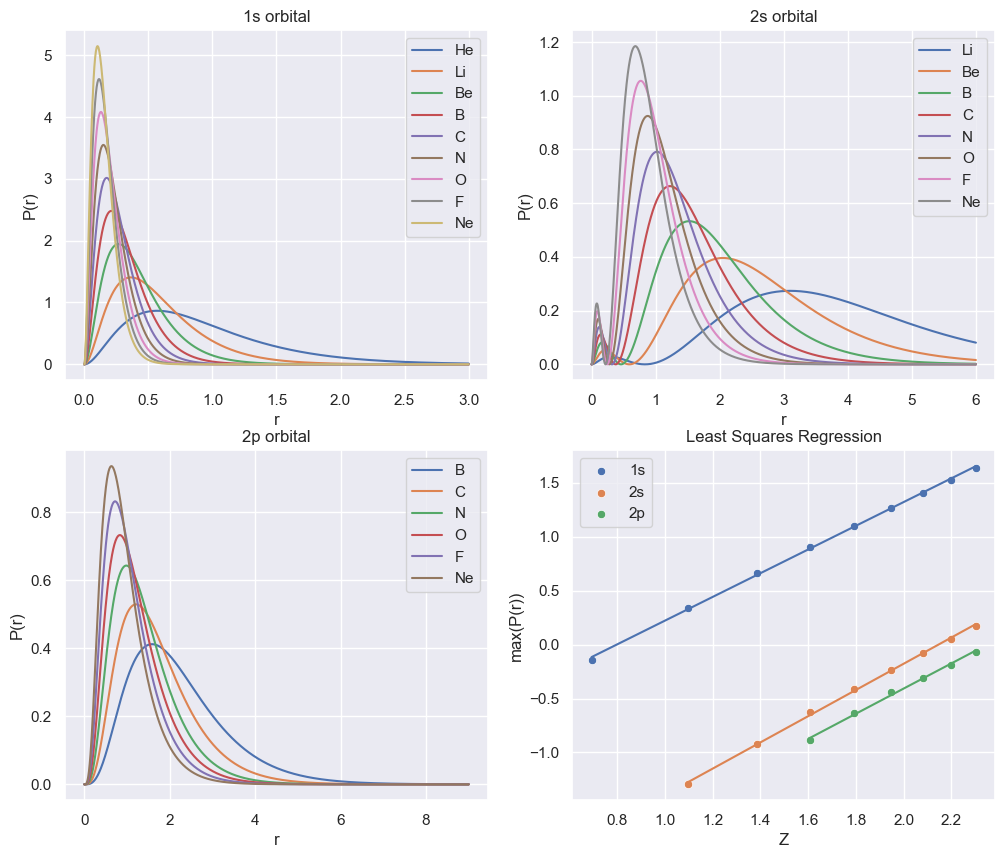

In [13]:
# plots for position space

theLoop = zip([1,2,2],[0,0,1],[3,6,9])

plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
for n, l, max_x in theLoop:
    orb = str(n)+inv_aqn[l]
    theDict['r'][orb] = plot_radial_distr_rep_orbit(n, l, 'r', max_x)
    plt.subplot(2,2,n+l+1)

for key0 in theDict['r']:
    x = []
    y = []
    
    for key in theDict['r'][key0]:
        x.append(atomic_number[key])
        max_val,idx = theDict['r'][key0][key]
        y.append(max_val)
    print(f'{key0} | ', end='')
    least_squares_regression(x, y, key0)
plt.xlabel('Z')
plt.ylabel('max(P(r))')
plt.title('Least Squares Regression')
plt.legend()
plt.show()   

1s | y = 1.116*x - 0.862

2s | y = 1.167*x - 2.576

2p | y = 1.094*x - 2.044



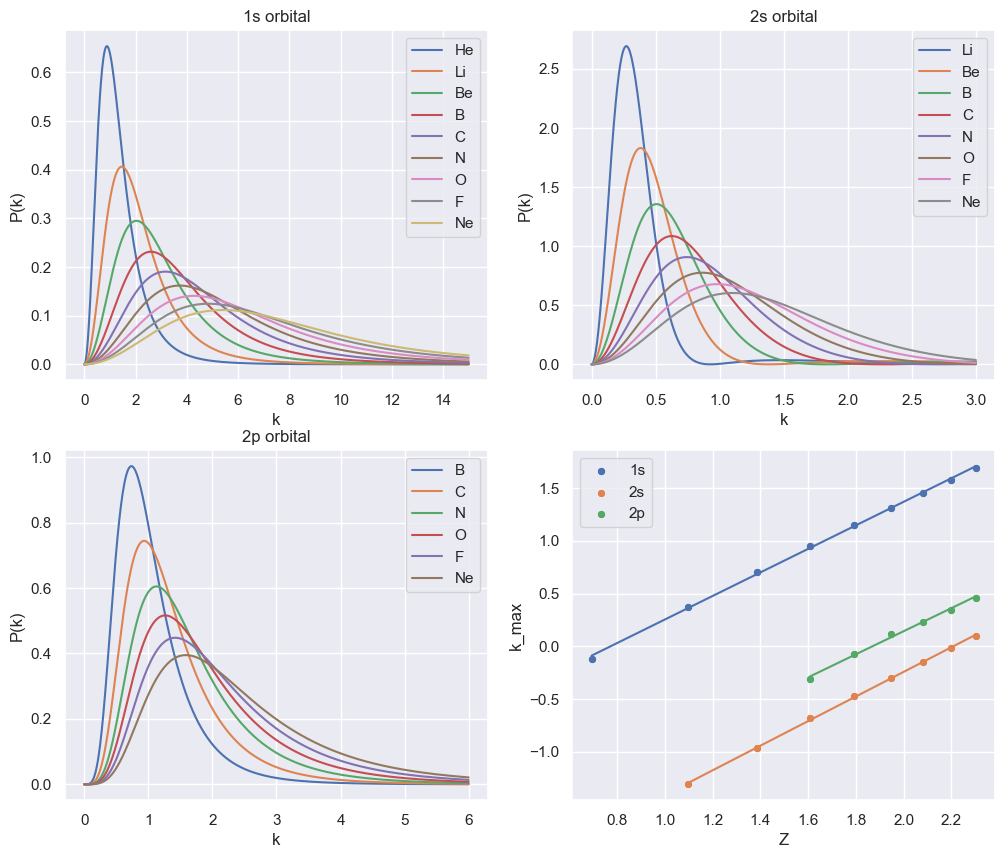

In [14]:
# plots for momentum space

theLoop = zip([1,2,2],[0,0,1],[15,3,6])

plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
for n, l, max_x in theLoop:
    orb = str(n)+inv_aqn[l]
    theDict['k'][orb] = plot_radial_distr_rep_orbit(n, l, 'k', max_x)
    plt.subplot(2,2,n+l+1)

for key0 in theDict['k']:
    x = []
    y = []
    
    for key in theDict['k'][key0]:
        x.append(atomic_number[key])
        max_val,idx = theDict['k'][key0][key]
        y.append(idx)
    print(f'{key0} | ', end='')
    least_squares_regression(x, y, key0)
plt.xlabel('Z')
plt.ylabel('k_max')
plt.legend()
plt.show()   

In [15]:
# Shannon information entropy data in position and momentum space

_Z = np.arange(2,10+1)

_Sr = np.array([float(Sr(_[1])) for _ in He_to_Ne])
_Sk = np.array([float(Sk(_[1])) for _ in He_to_Ne])
_S = _Sr + _Sk

_Ss = [_Sr, _Sk, _S]
S_labels = ['Sr', 'Sk', 'S']

entropy_plot_data = list(zip([_Z]*3, _Ss, S_labels))

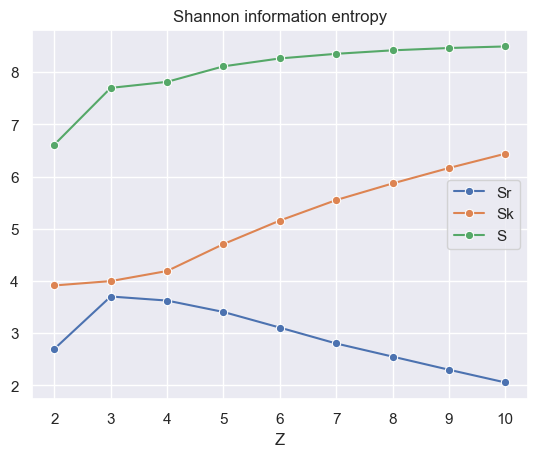

In [16]:
# plot Shannon information entropy data

for n,(x, y, label) in enumerate(entropy_plot_data, 1):
    sns.lineplot(x=x,y=y, marker='o', label=label)
plt.xlabel('Z')
plt.title('Shannon information entropy')
plt.show()